In [38]:
#FRAMEWORK FOR RECOMMENDATION SYSTEM AS MULTI OBJECTIVE OPTIMIZATION PROBLEM

In [28]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

# Define the recommendation problem
class RecommendationProblem(Problem):
    def __init__(self, num_users, num_courses, max_courses):
        super().__init__(n_var=num_users * num_courses,
                         n_obj=1,
                         n_constr=num_users,
                         xl=0,
                         xu=1)
        self.num_users = num_users
        self.num_courses = num_courses
        self.max_courses = max_courses

    def _evaluate(self, x, out, *args, **kwargs):
        # Reshape decision variables into a user-course matrix
        user_satisfaction_matrix = []
        user_course_recommendation_matrix = []
        for i in range(x.shape[0]):

            user_course_matrix = x[i,:].reshape(self.num_users, self.num_courses)

            # Objective: Maximize user satisfaction (e.g., sum of ratings)
            # You need to define how to calculate user satisfaction based on course attributes
            # For example, you can use a weighted sum of ratings, difficulty level, etc.
            user_satisfaction = np.random.rand(self.num_users, self.num_courses)  # Example user satisfaction matrix
            total_user_satisfaction = np.sum(user_course_matrix * user_satisfaction)
            user_satisfaction_matrix.append(-1 * total_user_satisfaction)  # Minimize negative total satisfaction

            # Constraints: Limiting the number of courses recommended to each user
            num_courses_recommended = np.sum(user_course_matrix, axis=1)
            print(num_courses_recommended) # Number of courses recommended to each user
            user_course_recommendation_matrix.append( num_courses_recommended - self.max_courses)
        out["F"] = user_satisfaction_matrix
        out["G"] = user_course_recommendation_matrix

# Instantiate the recommendation problem
num_users = 2
num_courses = 50  # Number of courses available
max_courses = 5  # Maximum number of courses to recommend to each user
problem = RecommendationProblem(num_users, num_courses, max_courses)

# Define the optimization algorithm (NSGA-II in this case)
algorithm = NSGA2(pop_size=100)

# Perform optimization
res = minimize(problem,
               algorithm,
               termination=('n_gen', 100),
               save_history=True,
               verbose=True)

# Get the optimal solutions
optimal_solutions = res.pop

# Print the optimal solutions
for solution in optimal_solutions:
    print("Decision Variables (User-Course Matrix):")
    print(solution.X.reshape(num_users, num_courses))
    print("Total User Satisfaction:", -1 * solution.F)
    print("Number of Courses Recommended to Each User:", solution.G)


[28.64861526 21.98246841]
[22.90157162 22.65479538]
[23.82836154 27.64001791]
[26.49712311 23.9836173 ]
[27.55379763 24.57160902]
[27.31975593 25.4882512 ]
[22.77488536 25.40964188]
[25.29510129 28.19609887]
[22.34372903 28.53881267]
[23.70732766 23.95817167]
[21.88082089 24.52694312]
[25.43240354 24.49291512]
[23.92703136 27.14987416]
[27.87322736 26.03152502]
[28.72847771 25.33651827]
[24.38920118 23.7616917 ]
[26.22699584 23.7540663 ]
[26.00380782 25.10097826]
[26.44914705 24.07426744]
[26.21793523 22.90734572]
[25.25736984 23.23387574]
[27.21257218 24.63570708]
[27.56451334 21.52079348]
[27.53884595 27.42682074]
[21.81738556 29.07829216]
[25.71565011 24.27951123]
[27.75975866 28.49178889]
[25.2971769  22.96882688]
[27.52865458 23.21938311]
[22.63425695 27.55928596]
[25.72987461 24.75543838]
[27.41173964 24.35474445]
[27.01975549 25.55329013]
[27.17198638 23.33697573]
[21.91653136 28.35316554]
[23.62819604 24.57017272]
[25.03976405 23.63320156]
[25.62035075 26.95477979]
[24.0408417 

# PRINTING THE RESULS

In [2]:
optimal_solutions = res.pop

# Print the optimal solutions
for solution in optimal_solutions:
    print("Decision Variables (User-Course Matrix):")
    print(solution.X.reshape(num_users, num_courses))
    print("Total User Satisfaction:", -1 * solution.F)
    print("Number of Courses Recommended to Each User:", solution.G)

Decision Variables (User-Course Matrix):
[[0.01453224 0.98772047 0.66322239 0.6915512  0.30299064 0.14292428
  0.85515529 0.54502847 0.09730283 0.31110773 0.51886516 0.92882722
  0.69287383 0.5653742  0.44835833 0.59217327 0.96672106 0.86335276
  0.53655208 0.20736865 0.66552031 0.01464848 0.79545432 0.86300844
  0.36399651 0.68683882 0.98261379 0.49186032 0.87055164 0.21218587
  0.51702447 0.73183325 0.03716259 0.93229294 0.11266816 0.5073884
  0.64983912 0.99617887 0.34730667 0.4010265  0.51126371 0.44835343
  0.13948724 0.40603919 0.10095157 0.75980493 0.95893548 0.00888836
  0.99375742 0.39801923]
 [0.906887   0.07991925 0.03768917 0.49178918 0.75009642 0.3439913
  0.24522443 0.65414718 0.44388622 0.97809617 0.26907915 0.10796827
  0.14976753 0.24728522 0.23186462 0.06419421 0.89677115 0.67460448
  0.27183363 0.15441336 0.41018145 0.43721278 0.65308069 0.1611624
  0.02889987 0.29260851 0.30842515 0.15713392 0.90962811 0.5365509
  0.22817647 0.03547579 0.83726834 0.07205143 0.003147

In [ ]:
# Solution for course recommendation using Multi Objective Recommendation System

In [29]:
import numpy as np
from pymoo.core.problem import Problem

# Define the course recommendation problem
class CourseRecommendation(Problem):
    def __init__(self):
        super().__init__(n_var=5, n_obj=3, n_constr=0, xl=0, xu=1)

    def _evaluate(self, x, out, *args, **kwargs):
        # Define the course data (course name, course description, skills, rating, difficulty level)
        course_data = {
            "Course A": {"name": "Course A", "description": "Description A", "skills": 0.8, "rating": 4.5, "difficulty": 0.3},
            "Course B": {"name": "Course B", "description": "Description B", "skills": 0.6, "rating": 4.0, "difficulty": 0.5},
            "Course C": {"name": "Course C", "description": "Description C", "skills": 0.9, "rating": 4.8, "difficulty": 0.2},
            "Course D": {"name": "Course D", "description": "Description D", "skills": 0.7, "rating": 4.2, "difficulty": 0.4},
            "Course E": {"name": "Course E", "description": "Description E", "skills": 0.5, "rating": 3.8, "difficulty": 0.6}
        }

        # Convert text data to numerical representations (e.g., using word embeddings)
        # For simplicity, we will use skills, rating, and difficulty directly
        # You can incorporate text processing techniques here

        # Calculate the distance from each course based on skills, rating, and difficulty level
        distances = np.array([[np.linalg.norm(np.array([x[i][0], x[i][1], x[i][2]]) - np.array([course_data[course]["skills"], course_data[course]["rating"], course_data[course]["difficulty"]])) for i in range(len(x))] for course in course_data])

        # Assign objectives for the course recommendation
        out["F"] = np.column_stack([np.min(distances, axis=0), np.mean(distances, axis=0), np.max(distances, axis=0)])

# Create an instance of the CourseRecommendation problem
problem = CourseRecommendation()

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -
     2 |      200 |      3 |  1.0000000000 |         ideal
     3 |      300 |      7 |  0.2912381371 |         ideal
     4 |      400 |      8 |  0.3965057853 |         ideal
     5 |      500 |      7 |  0.6031922271 |         ideal
     6 |      600 |      9 |  0.0176974720 |         ideal
     7 |      700 |     14 |  0.0622351445 |         ideal
     8 |      800 |     20 |  0.0465023731 |         ideal
     9 |      900 |     26 |  0.1796572356 |         ideal
    10 |     1000 |     34 |  0.0318418125 |         ideal
    11 |     1100 |     36 |  0.0127215498 |         ideal
    12 |     1200 |     49 |  0.0084209087 |         ideal
    13 |     1300 |     67 |  0.0320916982 |         nadir
    14 |     1400 |     86 |  0.0996532123 |         nadir
    15 |     1500 |    100 |  0.0730740450 |         nadir
    16 |     1600 |    100 |  0.0186927768 |         nad

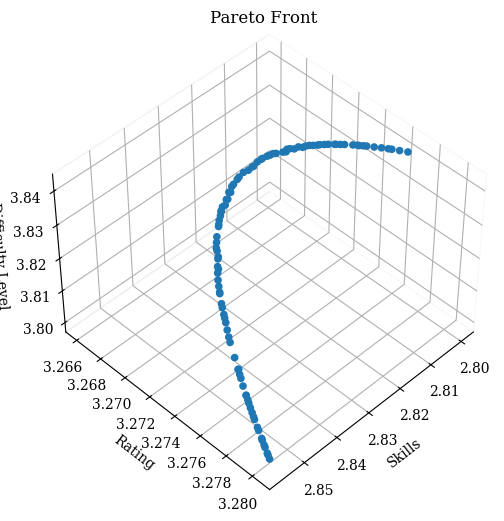

In [30]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# Define the algorithm
algorithm = NSGA2(pop_size=100)

# Minimize the defined problem using the NSGA-II algorithm
res = minimize(problem, algorithm, ('n_gen', 100), seed=1, verbose=True)

# Get the results
best_solution = res.X
best_fitness = res.F

# Print the best solution and fitness
print("Best Solution:")
print(best_solution)
print("Best Fitness:")
print(best_fitness)

# Visualize the Pareto front
plot = Scatter(title="Pareto Front", labels=["Skills", "Rating", "Difficulty Level"])
plot.add(res.F)
plot.show()

In [52]:
# Define your specific subject requirements
subject_requirements = [0.8, 4.5, 0.3]  # Example requirements (skills, rating, difficulty level)

# Calculate the distance from each solution on the Pareto front to the subject requirements
distances_to_subject = np.linalg.norm(best_fitness - subject_requirements, axis=0)

# Find the index of the solution that best matches the subject requirements
best_match_index = np.argmin(distances_to_subject)
print(best_match_index)
# Get the best recommendation based on the subject requirements
best_recommendation = best_solution[best_match_index]

# Print the best recommendation
print("Best Recommendation for the Subject:")
print(best_recommendation)

1
Best Recommendation for the Subject:
[0.68504806 1.         0.41473467 0.77158719 0.04016113]


In [40]:
course_data = {
            "Course A": {"name": "Course A", "description": "Description A", "skills": 0.8, "rating": 4.5, "difficulty": 0.3},
            "Course B": {"name": "Course B", "description": "Description B", "skills": 0.6, "rating": 4.0, "difficulty": 0.5},
            "Course C": {"name": "Course C", "description": "Description C", "skills": 0.9, "rating": 4.8, "difficulty": 0.2},
            "Course D": {"name": "Course D", "description": "Description D", "skills": 0.7, "rating": 4.2, "difficulty": 0.4},
            "Course E": {"name": "Course E", "description": "Description E", "skills": 0.5, "rating": 3.8, "difficulty": 0.6}
        }

In [53]:
# Define the course names
course_names = list(course_data.keys())
# Define your specific subject requirements
subject_requirements = [0.8, 4.5, 0.3]  # Example requirements (skills, rating, difficulty level)

# Calculate the distance from each solution on the Pareto front to the subject requirements
distances_to_subject = np.linalg.norm(best_fitness - subject_requirements, axis=1)

# Define the course names
course_names = list(course_data.keys())

# Check if the best match index is within the valid range
if best_match_index < len(course_names):
    # Get the course name for the best recommendation
    best_course_name = course_names[best_match_index]

    # Get the best recommendation and course name
    best_recommendation = best_solution[best_match_index]
    best_course_details = course_data[best_course_name]

    # Print the best recommendation and course name
    print("Best Recommendation for the Subject:")
    print("Course Name:", best_course_name)
    print("Course Details:", best_course_details)
    print("Recommendation:", best_recommendation)
else:
    print("No valid recommendation found.")

Best Recommendation for the Subject:
Course Name: Course B
Course Details: {'name': 'Course B', 'description': 'Description B', 'skills': 0.6, 'rating': 4.0, 'difficulty': 0.5}
Recommendation: [0.68504806 1.         0.41473467 0.77158719 0.04016113]
